# Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

## Imports

In [3]:
# Import Iris Dataset from pydata

from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle_zillow as w
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## 1. 

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [4]:
# Acquire the data
iris = data('iris')

In [5]:
w.check_columns(iris)

Total rows: 150
Total columns: 5


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,Sepal.Length,float64,35,0,0.0,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5, 4.5, 5.3, 7.0, 6.4, ...","[4.3, 7.9, 5.843333333333334]"
1,Sepal.Width,float64,23,0,0.0,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4.0, 4.4, 3.8, 3.3, 4.1, 4.2, 2.3, 2.8, ...","[2.0, 4.4, 3.0573333333333337]"
2,Petal.Length,float64,43,0,0.0,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, 4.7, 4.5, 4.9, 4.0, 4.6, 3.3, 3.9, 3.5, ...","[1.0, 6.9, 3.7580000000000005]"
3,Petal.Width,float64,22,0,0.0,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1.0, 1.1, 1.8, 1.2, 1.7, 2.5, 1.9, ...","[0.1, 2.5, 1.1993333333333336]"
4,Species,object,3,0,0.0,"[setosa, versicolor, virginica]",None


### a. Choose features other than the ones used in the lesson.

In [6]:
# Choose features
feats = iris[['Sepal.Length', 'Sepal.Width']]

In [7]:
# Split into train, validate, test
train, validate, test = w.split_data(feats)

train: 90 (60% of 150)
validate: 30 (20% of 150)
test: 30 (20% of 150)


In [8]:
# Scale using MinMax
train_mm, validate_mm, test_mm = w.multi_scaler(train, validate, test, scaler='MM')

In [9]:
# Fit model using Kmeans and predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_mm)
train_mm['cluster'] = kmeans.predict(train_mm)

### b. Visualize the results of your clustering.

Text(0.5, 1.0, 'Visualizing Actual Species')

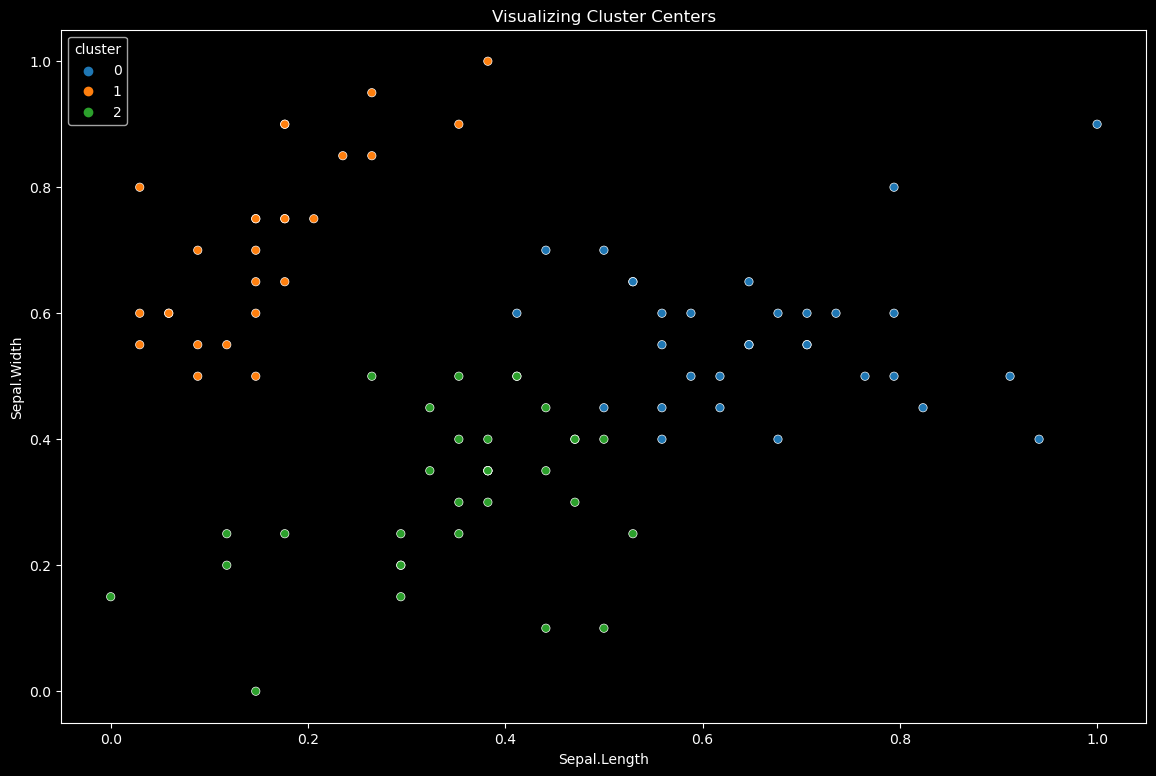

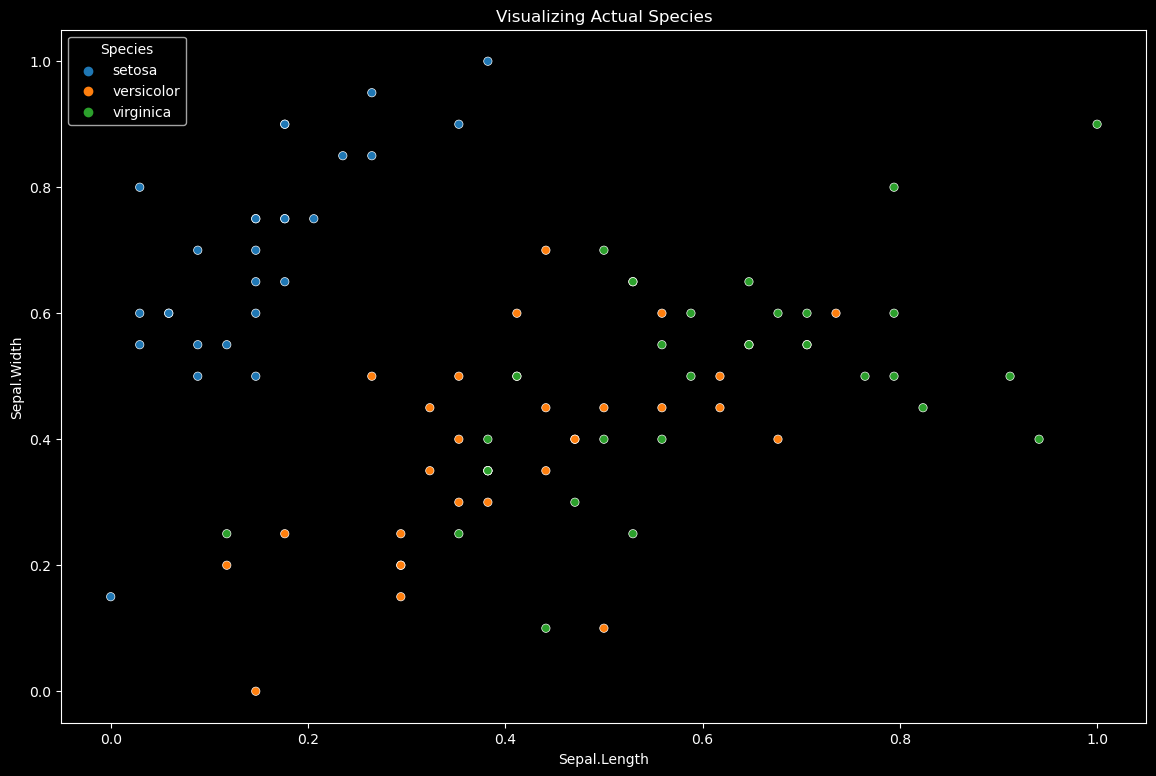

In [19]:
# Viz the cluster
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data=train_mm, hue='cluster', palette='tab10')
# Title it
plt.title('Visualizing Cluster Centers')

# Plot the actual species
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data=train_mm, hue=iris.Species, palette='tab10')
# Title it
plt.title('Visualizing Actual Species')

### c. Use the elbow method to visually select a good value for k.

Text(0.5, 1.0, 'Change in inertia as k increases')

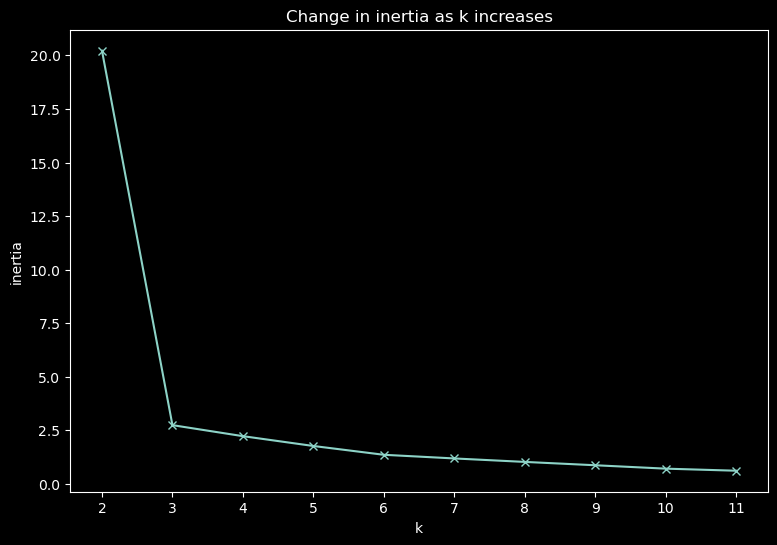

In [20]:
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train_mm).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

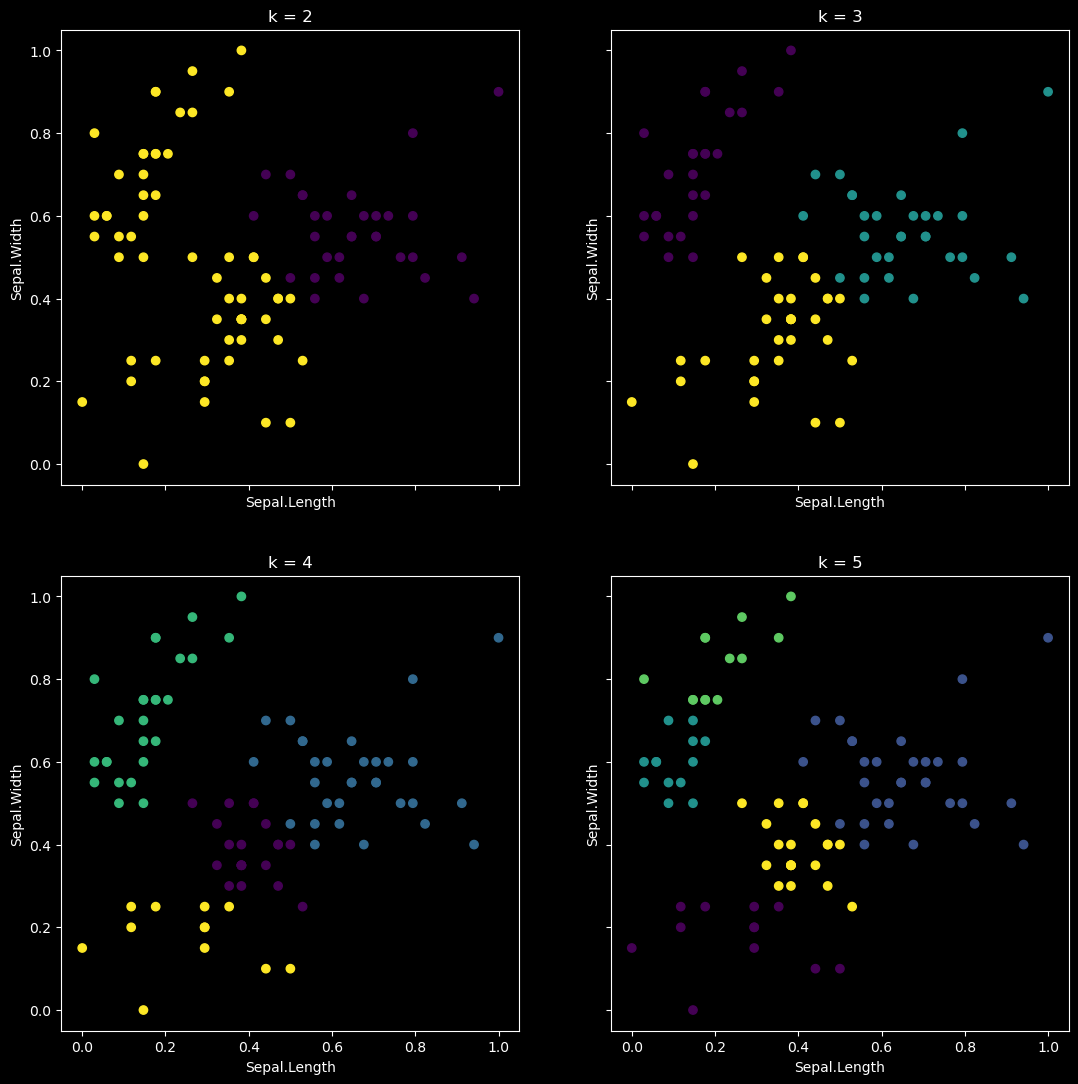

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['Sepal.Length'], train_mm['Sepal.Width'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Sepal.Length', ylabel='Sepal.Width')

### d. Repeat the clustering, this time with 3 different features.

In [11]:
# Choose 3 features
feats3 = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length']]

In [12]:
# Split using onyl 3 features
train, validate, test = w.split_data(feats3)

train: 90 (60% of 150)
validate: 30 (20% of 150)
test: 30 (20% of 150)


In [13]:
# Scale using MM
train_mm, validate_mm, test_mm = w.multi_scaler(train, validate, test, scaler='MM')

In [14]:
# Fit and predict with KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_mm)
train_mm['cluster'] = kmeans.predict(train_mm)

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

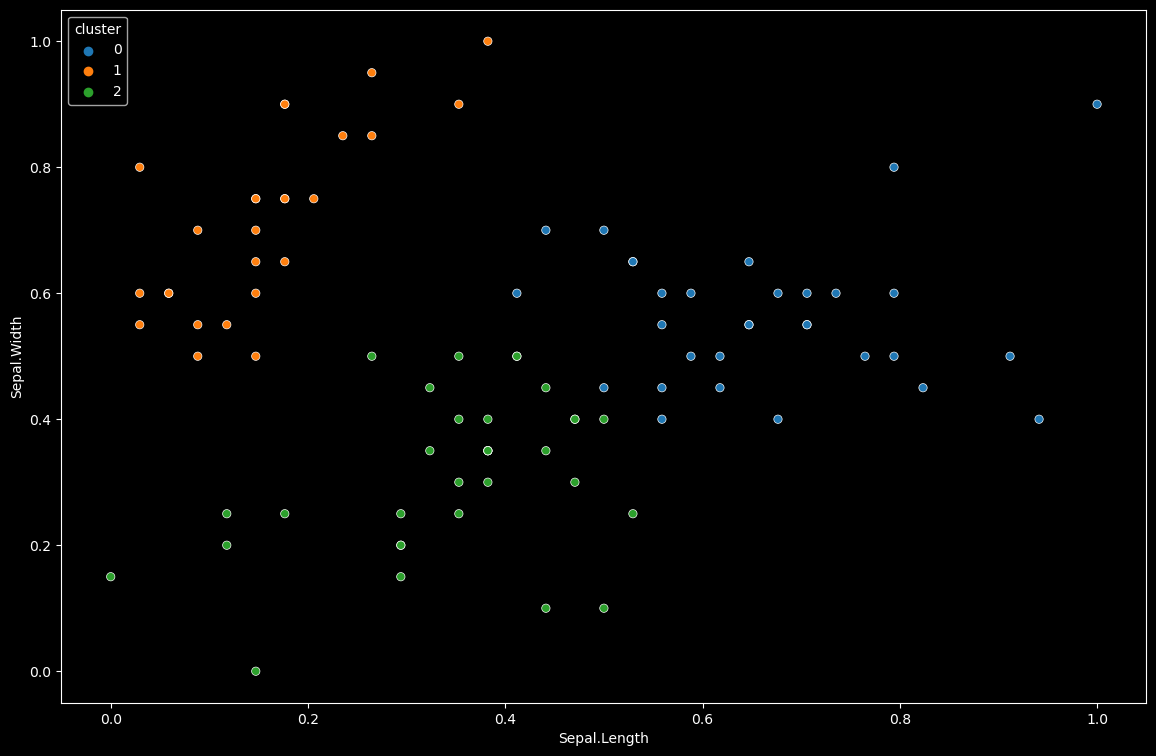

In [21]:
# Visualize
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data=train_mm, hue='cluster', palette='tab10')

<Axes: >

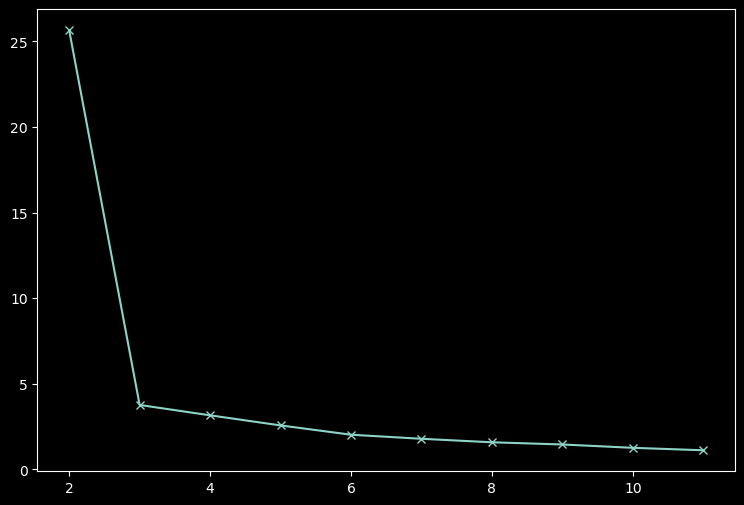

In [16]:
# Visualize intertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train_mm).inertia_ for k in range(2, 12)}).plot(marker='x')

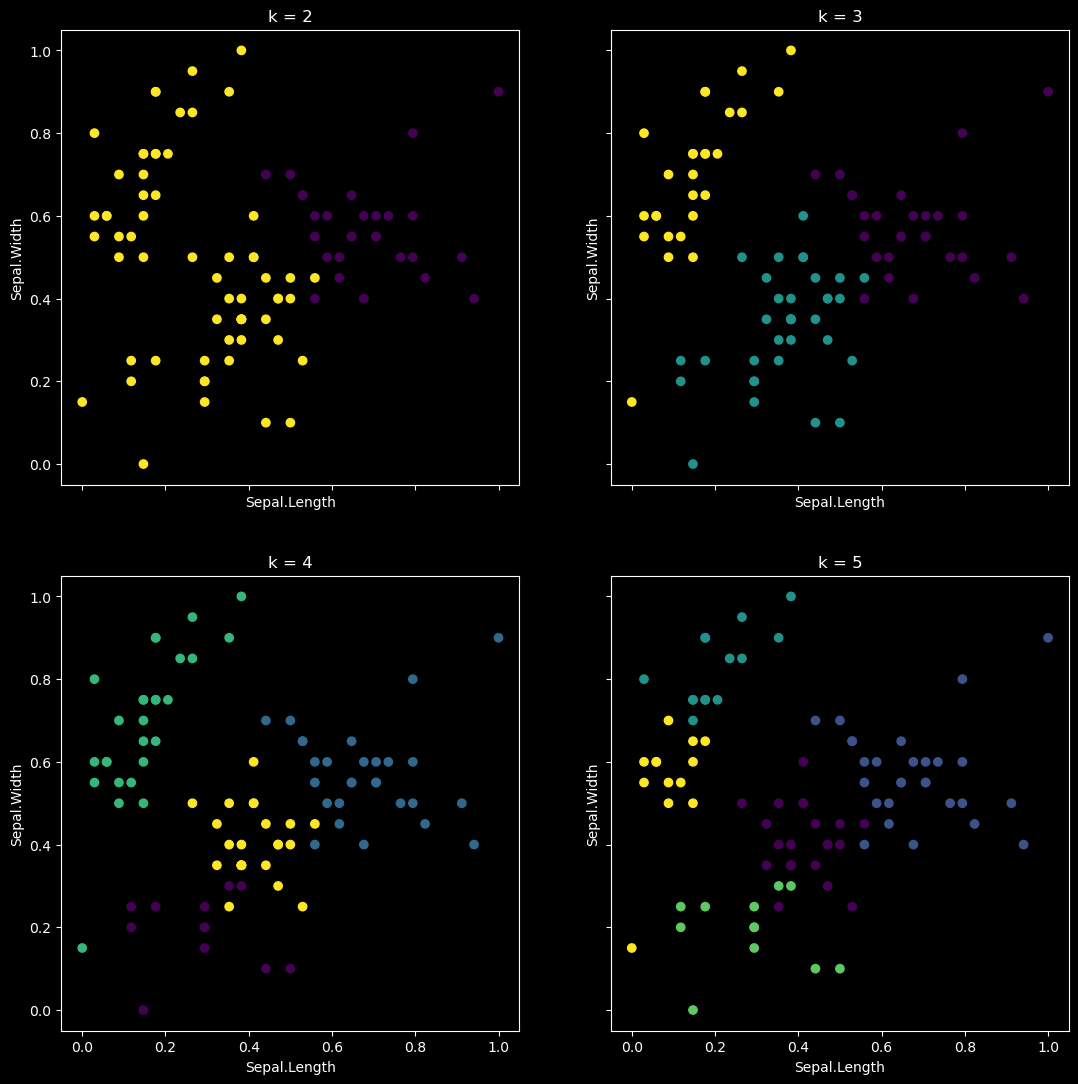

In [17]:
# Visualize each K Value
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['Sepal.Length'], train_mm['Sepal.Width'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Sepal.Length', ylabel='Sepal.Width')

## 2. 

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [39]:
# Import wrangle_mall
import wrangle_mall as wm

In [40]:
# Get data
mall = wm.acquire_mall()

In [41]:
# Encode the gender
encode = ['gender']

mall = w.encode_columns(mall, encode)

In [42]:
# Drop the customer id
mall = mall.drop(columns=['customer_id'])

In [43]:
# Split data
train, validate, test = w.split_data(mall)

train: 120 (60% of 200)
validate: 40 (20% of 200)
test: 40 (20% of 200)


In [44]:
# Scale with MM
train_mm, validate_mm, test_mm = w.multi_scaler(train, validate, test, scaler='MM')

<Axes: >

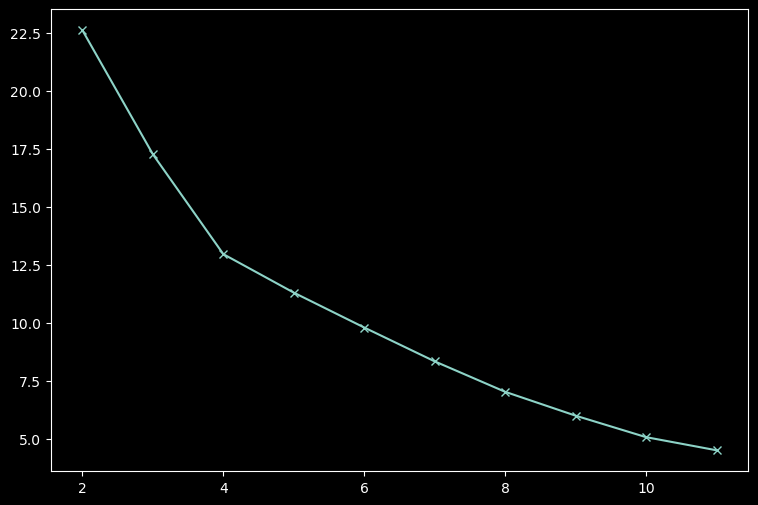

In [45]:
# Plot intertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train_mm).inertia_ for k in range(2, 12)}).plot(marker='x')

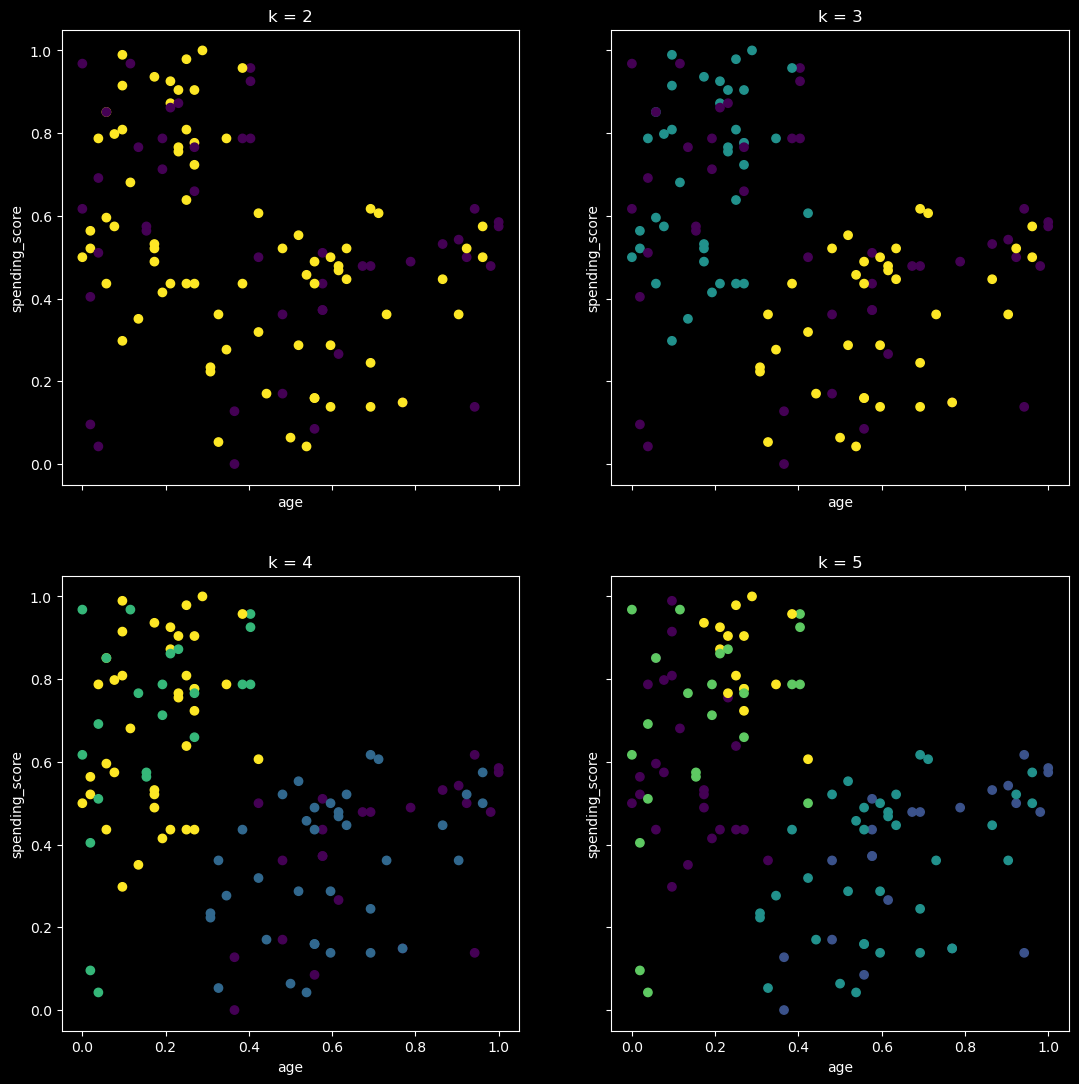

In [47]:
# Visualize each K Value

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['age'], train_mm['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

## 3. 
How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

### Our train, validate, test is unscaled (encoded gender)

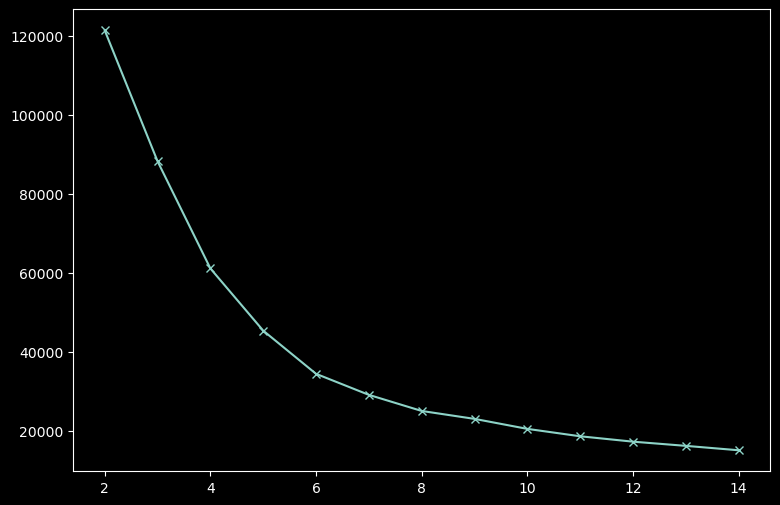

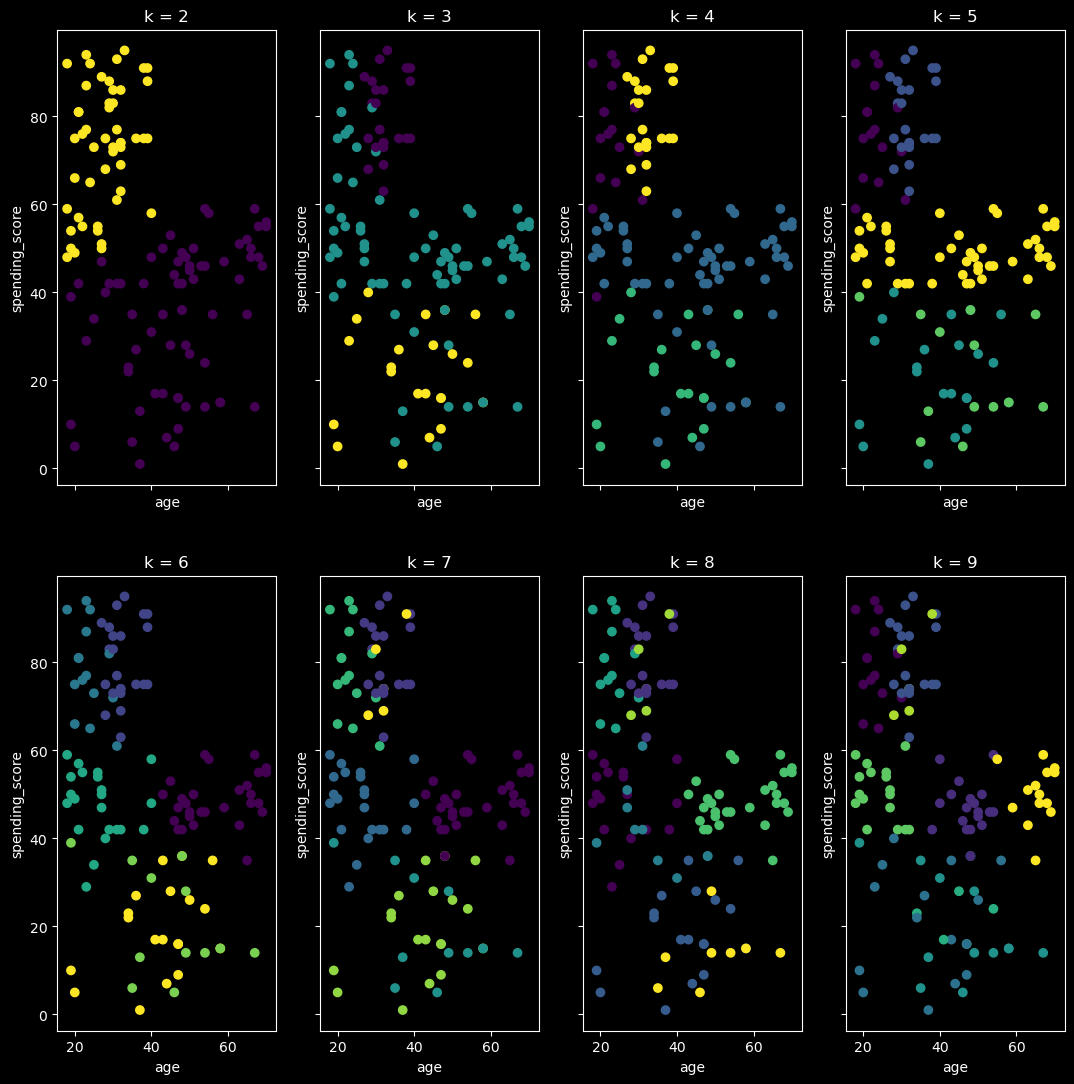

In [27]:
# Visualize inertia (unscaled data)

# Plot intertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train).inertia_ for k in range(2, 15)}).plot(marker='x')

# Visualize each K Value (unscaled data)
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(train).predict(train)
    ax.scatter(train['age'], train['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

### Our train_mm, validate_mm, and test_mm is scaled with MinMax (encoded gender)

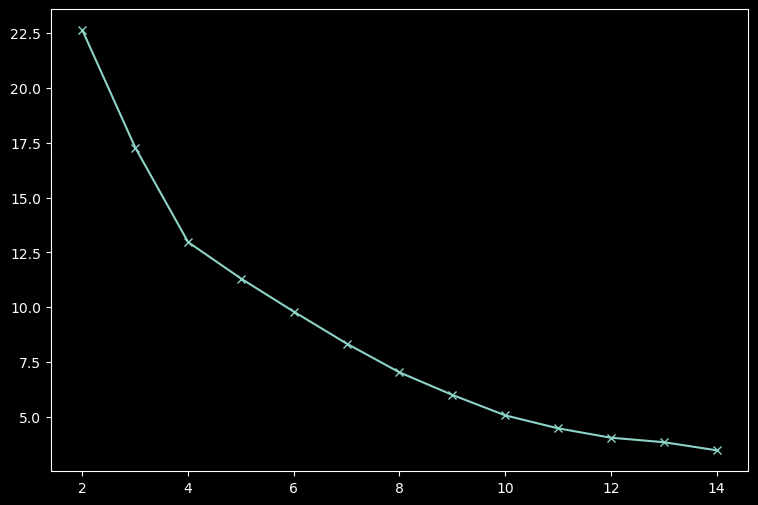

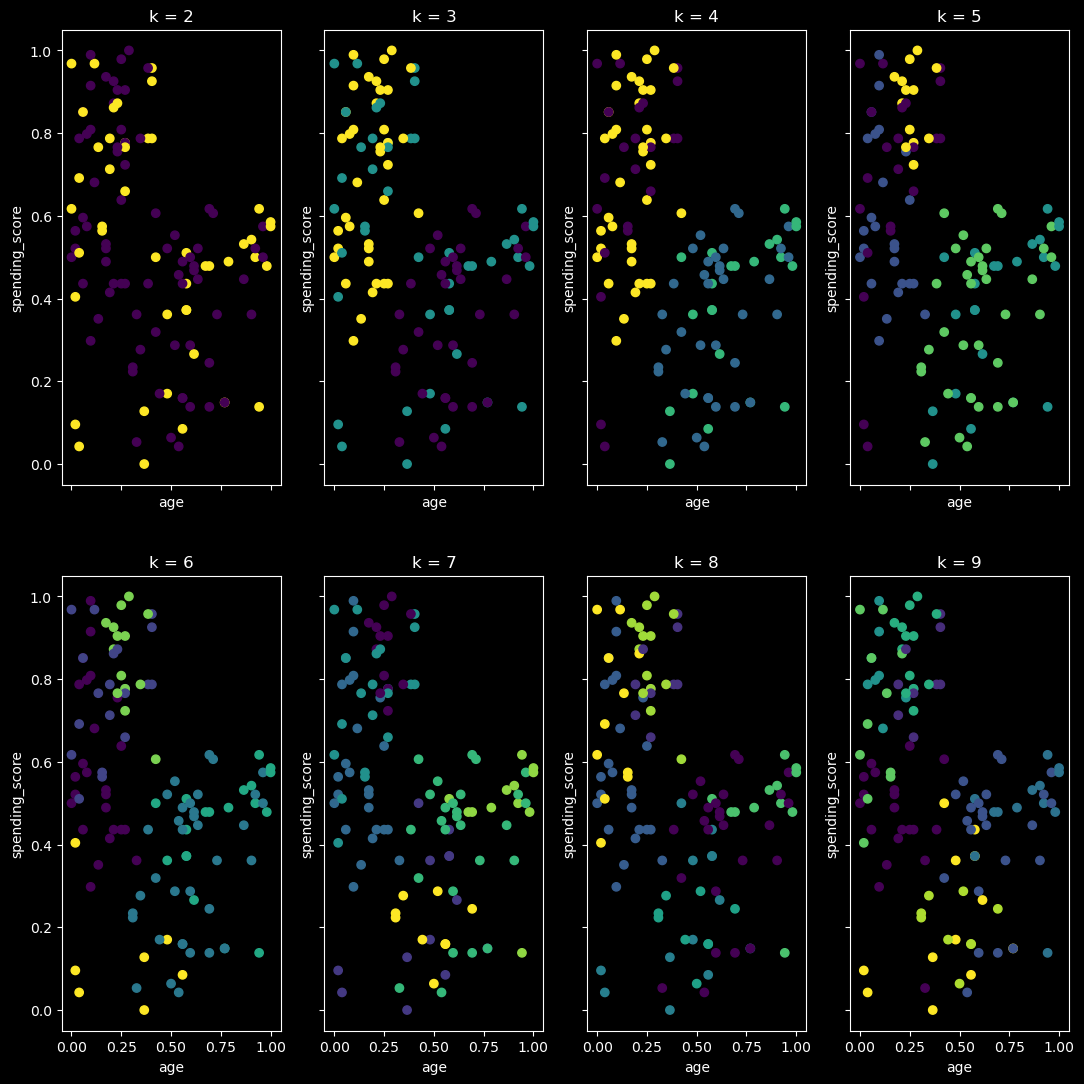

In [28]:
# Plot intertia
plt.figure(figsize=(9,6))
pd.Series({k: KMeans(k).fit(train_mm).inertia_ for k in range(2, 15)}).plot(marker='x')

# Visualize each K Value (scaled)
fig, axs = plt.subplots(2, 4, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 10)):
    clusters = KMeans(k).fit(train_mm).predict(train_mm)
    ax.scatter(train_mm['age'], train_mm['spending_score'], c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')

<u> In the intertia plot, the scaled data seems to have a much more prominent elbow whereas in the unscaled data, the slope is much more gradual and harder to pinpoint a prominent elbow.

In the K plots, when looking at the grouping compared only to age, it is quite hard to see a form of grouping. Most likely due to the model being fit to all of the features, not just the age feature. We chose to plot against age, because it had the highest correlation score when compared to spending score.